Построение графика функции и нахождение корней

Положительные корни: [0.      0.30311 0.68891 0.84109]


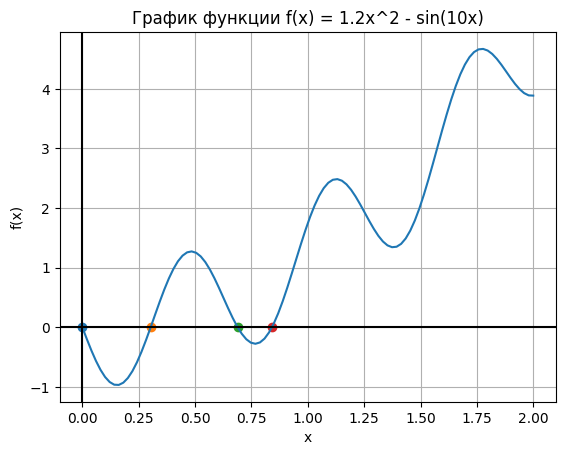

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определяем функцию
def f(x):
    return 1.2 * x**2 - np.sin(10 * x)

# Создаем массив значений x для построения графика
x = np.linspace(0, 2, 100)
y = f(x)

# Построение графика
plt.plot(x, y)
plt.axhline(0, color='black')  # линия y=0
plt.axvline(0, color='black')  # линия x=0
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x) = 1.2x^2 - sin(10x)')
plt.grid(True)

# Нахождение корней функции
# Используем начальные приближения на основе графика
initial_guesses = [0.1, 0.4, 0.7, 1.0]
roots = fsolve(f, initial_guesses)

# Отбор только положительных корней
positive_roots = [root for root in roots if root > 0]
positive_roots = np.unique(np.round(positive_roots, 5))

for root in positive_roots:
    plt.scatter(root, 0)

print(f"Положительные корни: {positive_roots}")

Параметры нормального и равномерного распределений

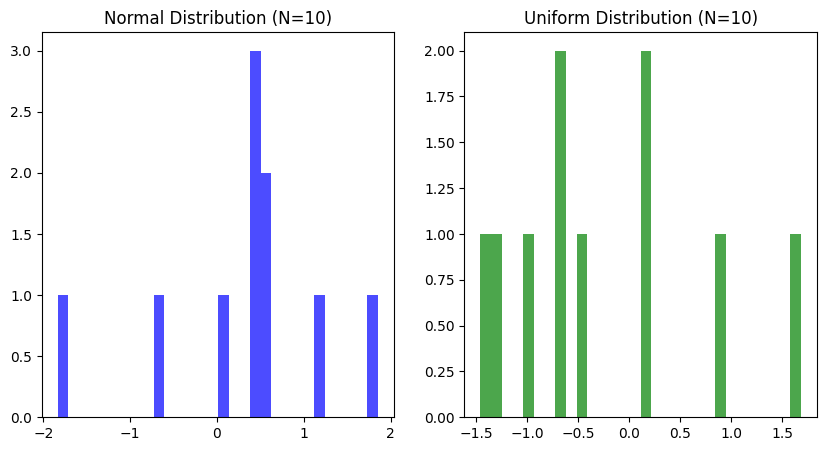

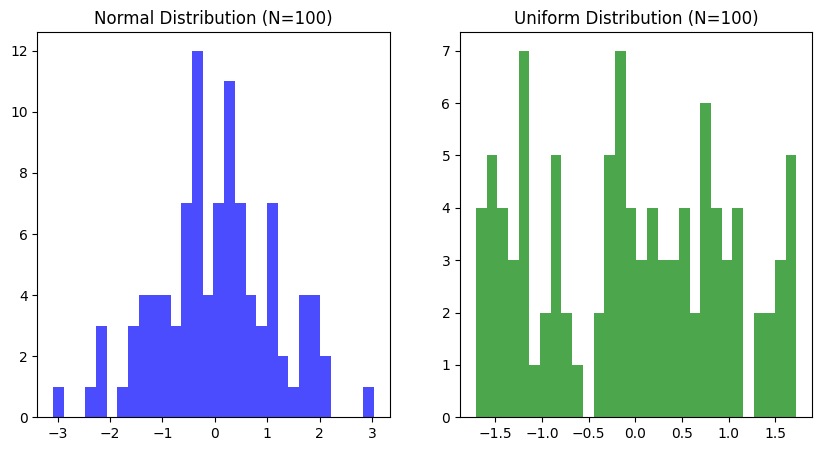

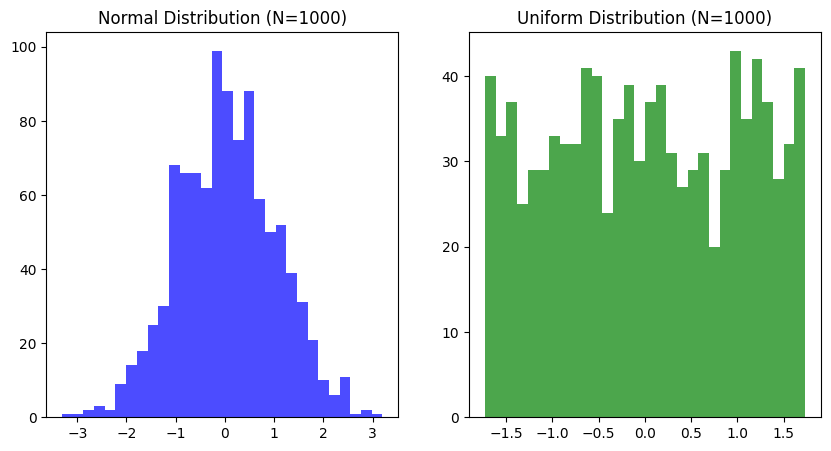

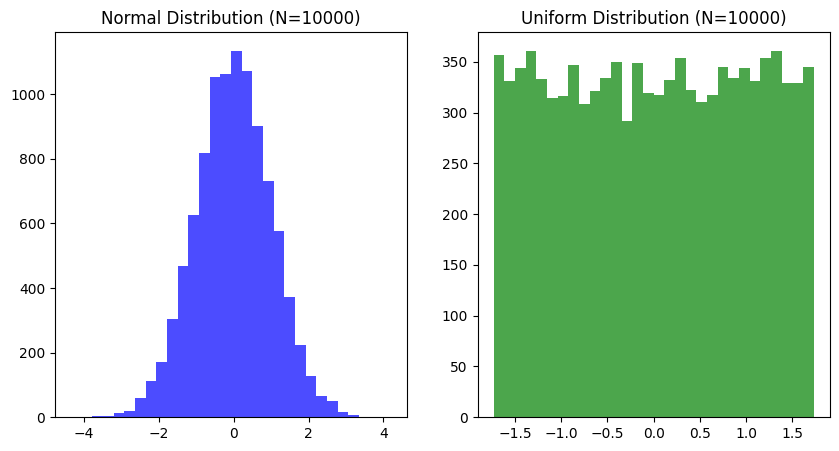

In [ ]:
# Задаем параметры распределений
N_values = [10, 100, 1000, 10000]

def generate_and_plot_histograms(N):
    # Генерация нормального распределения
    ui = np.random.normal(0, 1, N) #(матожидание, дисперсия^2, N)

    # Генерация равномерного распределения
    a, b = -np.sqrt(3), np.sqrt(3) # матожидание = (a+b)/2, дисперсия = ((b-a)^2)/12
    gi = np.random.uniform(a, b, N)

    # Построение гистограмм
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].hist(ui, bins=30, alpha=0.7, color='blue')
    axs[0].set_title(f'Normal Distribution (N={N})')

    axs[1].hist(gi, bins=30, alpha=0.7, color='green')
    axs[1].set_title(f'Uniform Distribution (N={N})')

    plt.show()

# Генерация и отображение гистограмм для разных значений N
for N in N_values:
    generate_and_plot_histograms(N)

Аппроксимация табличных данных

Коэффициенты функции вида α * exp(β * x) + γ: α = 2265.0696, β = 0.0002, γ = -2263.1750


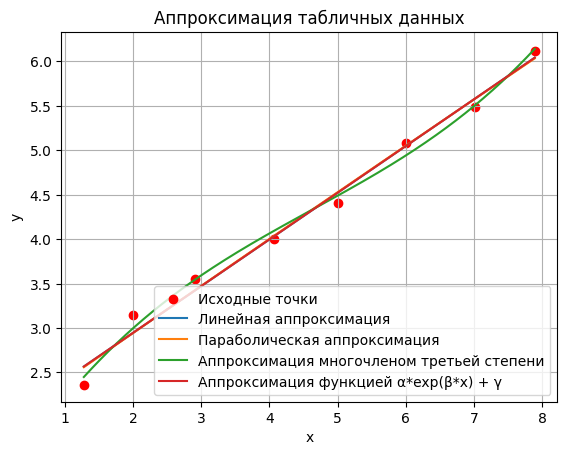

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Заданные точки
x = np.array([1.28, 2.00, 2.91, 4.07, 5.00, 6.00, 7.01, 7.89])
y = np.array([2.36, 3.15, 3.55, 4.00, 4.41, 5.08, 5.49, 6.12])

# Линейная аппроксимация (прямая линия)
coeff_linear = np.polyfit(x, y, 1)
p_linear = np.poly1d(coeff_linear)

# Параболическая аппроксимация (многочлен второй степени)
coeff_parabolic = np.polyfit(x, y, 2)
p_parabolic = np.poly1d(coeff_parabolic)

# Аппроксимация многочленом третьей степени
coeff_cubic = np.polyfit(x, y, 3)
p_cubic = np.poly1d(coeff_cubic)

# Аппроксимация функцией вашего варианта: f(x) = α * exp(β * x) + γ
def func_variant(x, alpha, beta, gamma):
    return alpha * np.exp(beta * x) + gamma

# Поиск коэффициентов α, β, γ с увеличенным числом итераций maxfev
try:
    popt, pcov = curve_fit(func_variant, x, y, p0=(1, 0.1, 1), maxfev=5000)
    print(f"Коэффициенты функции вида α * exp(β * x) + γ: α = {popt[0]:.4f}, β = {popt[1]:.4f}, γ = {popt[2]:.4f}")
except RuntimeError as e:
    print(f"Оптимальные параметры не найдены: {e}")

# Построение графиков
x_fit = np.linspace(min(x), max(x), 500)

plt.scatter(x, y, color='red', label='Исходные точки')
plt.plot(x_fit, p_linear(x_fit), label='Линейная аппроксимация')
plt.plot(x_fit, p_parabolic(x_fit), label='Параболическая аппроксимация')
plt.plot(x_fit, p_cubic(x_fit), label='Аппроксимация многочленом третьей степени')

if 'popt' in locals():
    plt.plot(x_fit, func_variant(x_fit, *popt), label='Аппроксимация функцией α*exp(β*x) + γ')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация табличных данных')
plt.legend()
plt.grid(True)
plt.show()


Линейные и полиномиальные аппроксимации можно выполнить с использованием матричного деления (решение СЛАУ).<br>
<br>
Для более сложных, нелинейных функций, таких как экспоненциальная аппроксимация, требуется итерационная подгонка с использованием специализированных методов, таких как datafit в Scilab.

# Контрольные вопросы
3. Какова основная идея итерационных методов решения уравнений?
Основная идея итерационных методов решения уравнений заключается в следующем:

Итерационные методы используют последовательное приближение для нахождения корня уравнения. Исходя из начального приближения, итерационный процесс обновляет это приближение на каждом шаге, приближаясь к истинному корню уравнения с каждым шагом.<br>
4. Перечислите известные методы численного решения уравнений.
Известные методы численного решения уравнений включают:

### Метод бисекции (дихотомии):

Делит отрезок, на котором функция меняет знак, пополам и выбирает ту половину, в которой корень.
Прост, но медленный.

### Метод Ньютона (метод касательных):

Быстрый итерационный метод, который использует производную функции для построения касательных к графику.
Требует вычисления производной, что не всегда удобно или возможно.

### Метод секущих:

Упрощение метода Ньютона, но без необходимости вычисления производной.
Использует две предыдущие точки для построения приближающей прямой (секущей).
Метод простой итерации:

Переписывает уравнение в виде x=g(x) и использует повторные подстановки.
Работает, если функция
g(x) обладает определенными свойствами, обеспечивающими сходимость.

### Метод фиксированной точки:

Специальный случай метода простой итерации, когда уравнение уже представлено в виде x=g(x).
Применяется для нахождения точек, в которых функция пересекает прямую y=x.

5. Каковы задачи аппроксимации и интерполяции таблично заданных функций?

Аппроксимация и интерполяция — это методы нахождения функции, которая наилучшим образом описывает зависимость между парой переменных на основе известных (табличных) данных.

Интерполяция:

Задача интерполяции заключается в нахождении функции, которая точно проходит через все заданные точки. Интерполяционная функция f(x) должна принимать известные значения yi в соответствующих точках xi. Интерполяция используется, когда необходимо определить значение функции в промежуточной точке между известными данными.

Аппроксимация:

Задача аппроксимации состоит в нахождении функции, которая наилучшим образом приближает заданные точки, но не обязательно точно проходит через каждую из них. Основная цель аппроксимации — минимизация отклонения между экспериментальными данными и аппроксимирующей функцией, обычно измеряемого как сумма квадратов отклонений.

6. Какова основная идея метода наименьших квадратов?
Основная идея метода наименьших квадратов заключается в нахождении таких параметров функции, которые минимизируют сумму квадратов отклонений (разностей) между наблюдаемыми значениями и значениями, предсказанными моделью.

Конкретнее, если у нас есть набор экспериментальных данных (xi, yi), метод наименьших квадратов стремится минимизировать следующую сумму:

S=∑(yi - f(xi))^2

где yi — экспериментальные данные, а f(xi) — значения, предсказанные аппроксимирующей функцией. Метод наименьших квадратов позволяет подобрать коэффициенты аппроксимирующей функции так, чтобы сумма квадратов отклонений была минимальной, что в свою очередь дает наилучшее приближение к данным.